Dataset loaded with shape: (2845342, 47)


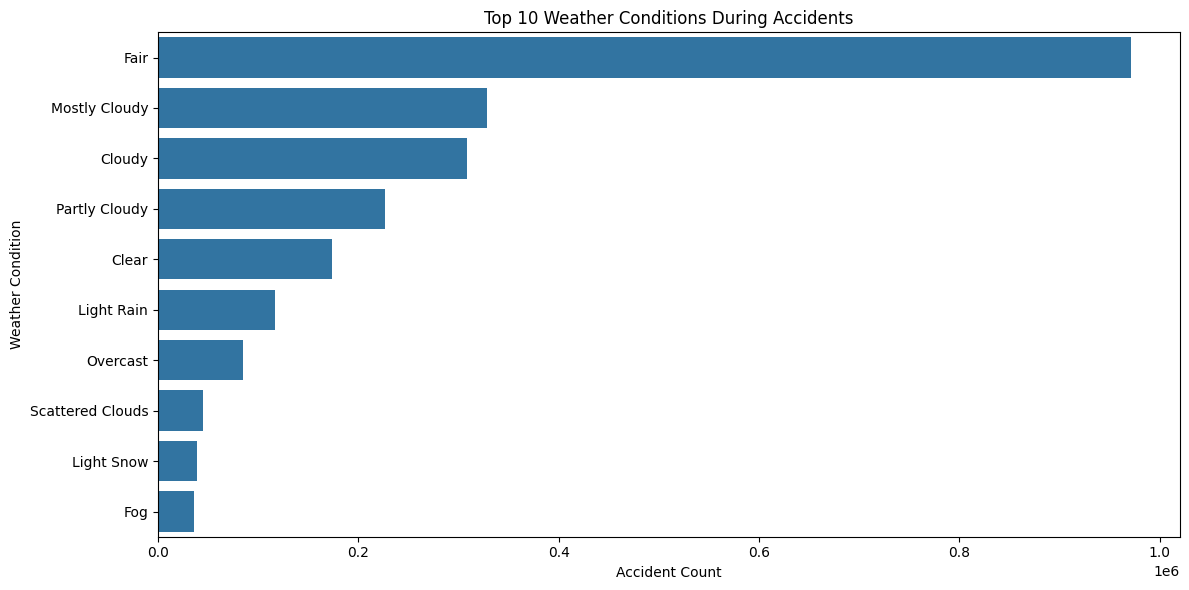

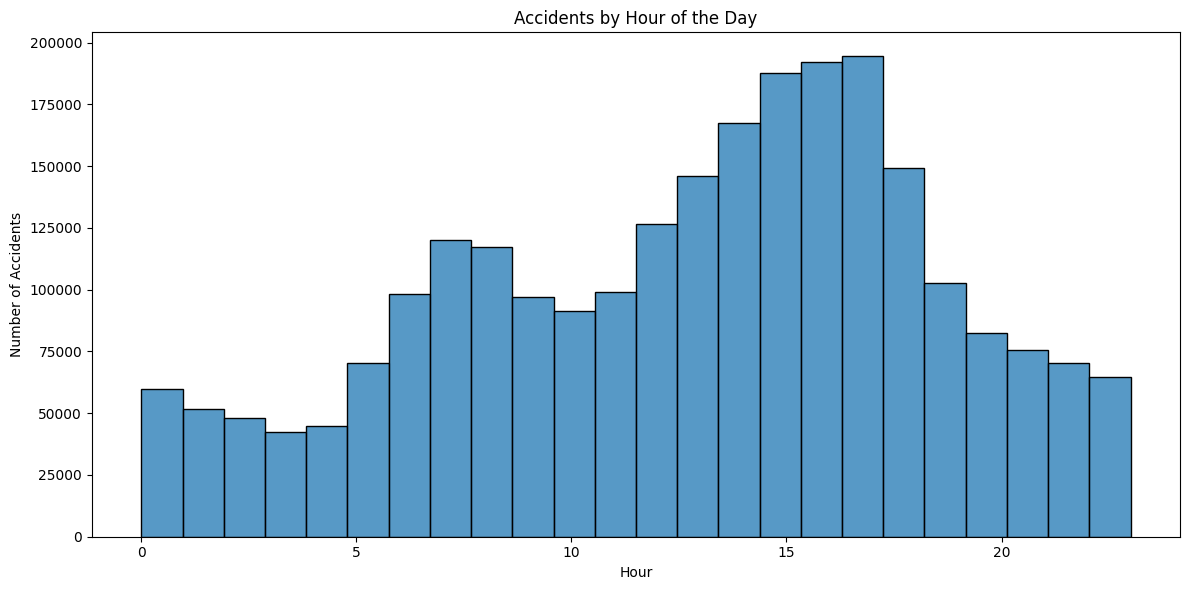

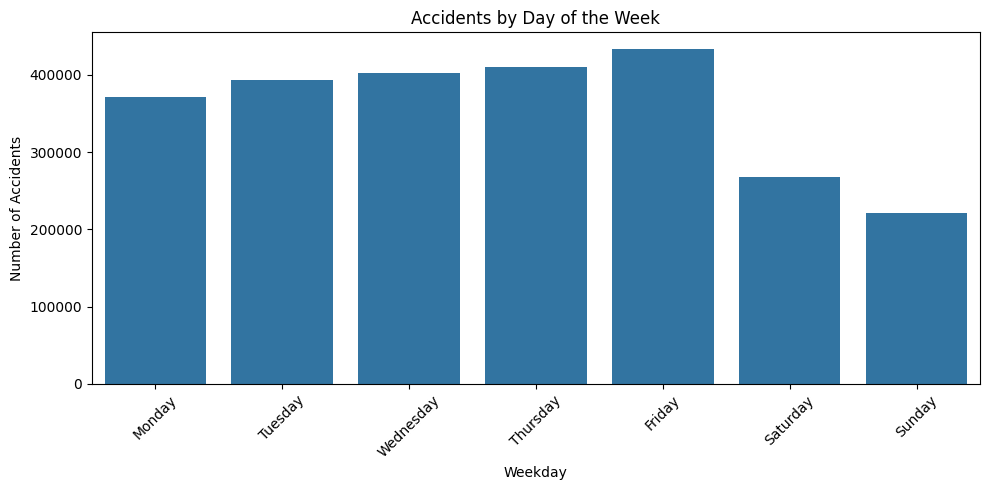

In [6]:
# 🚨 STEP 1: Install required packages
!pip install folium --quiet

# 🚦 STEP 2: Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap
from IPython.display import HTML

# STEP 3: Define the dataset URL
url = 'https://huggingface.co/datasets/nateraw/us-accidents/resolve/main/US_Accidents_Dec21_updated.csv'

# STEP 4: Load dataset
df = pd.read_csv(url)
print("Dataset loaded with shape:", df.shape)

# STEP 5: Data Cleaning & Feature Extraction (Warning-Free)
df = df.dropna(subset=['Start_Lat', 'Start_Lng', 'Weather_Condition', 'Start_Time']).copy()
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df = df.dropna(subset=['Start_Time']).copy()

df['Hour'] = df['Start_Time'].dt.hour
df['Weekday'] = df['Start_Time'].dt.day_name()
df['Month'] = df['Start_Time'].dt.month_name()

# STEP 6: Weather Conditions Plot
plt.figure(figsize=(12, 6))
sns.countplot(y='Weather_Condition', data=df, order=df['Weather_Condition'].value_counts().iloc[:10].index)
plt.title('Top 10 Weather Conditions During Accidents')
plt.xlabel('Accident Count')
plt.ylabel('Weather Condition')
plt.tight_layout()
plt.show()

# STEP 7: Accidents by Hour
plt.figure(figsize=(12, 6))
sns.histplot(df['Hour'], bins=24, kde=False)
plt.title('Accidents by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()

# STEP 8: Accidents by Weekday
plt.figure(figsize=(10, 5))
sns.countplot(x='Weekday', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Accidents by Day of the Week')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# STEP 9: Accident Hotspot Map (HEATMAP)

# Sample 10,000 points to keep map fast
sample_df = df[['Start_Lat', 'Start_Lng']].sample(n=10000, random_state=1)

# Create map with default tiles (recommended for simplicity)
accident_map = folium.Map(
    location=[sample_df['Start_Lat'].mean(), sample_df['Start_Lng'].mean()],
    zoom_start=5
)

# Add heatmap layer
HeatMap(sample_df.values.tolist(), radius=7).add_to(accident_map)

# Display map directly in Colab
accident_map

